<a href="https://colab.research.google.com/github/me-Maddy16/Applied-Machine-Learning/blob/main/ANN_collab_churnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install tensorflow


In [55]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [56]:
print(tf.__version__)

2.18.0


In [57]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
# import the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [59]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [60]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [61]:
# data cleaning
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [62]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [63]:
#dropping the columns
X=X.drop(['Geography','Gender'], axis=1)

In [64]:
#Concatenate
X=pd.concat([X,geography,gender],axis=1)

In [65]:
#Splitting to train_set and test_set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [66]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [67]:
#Creation of ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU, ReLU
from tensorflow.keras.layers import Dropout

In [68]:
classifier=Sequential()

In [69]:
#Adding input layer
classifier.add(Dense(units=11,activation='relu')) #relu will be applied to next layer

In [70]:
#Adding 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
#adding dropout
classifier.add(Dropout(0.2))

In [71]:
#Adding 2nd hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [72]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [73]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [75]:
## Early stopping- when accuracy is not increasing, we stop iterations
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [76]:
#Train with early stopping
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7843 - loss: 0.5407 - val_accuracy: 0.8031 - val_loss: 0.4526
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7943 - loss: 0.4655 - val_accuracy: 0.8088 - val_loss: 0.4299
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8155 - loss: 0.4187 - val_accuracy: 0.8148 - val_loss: 0.4173
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8161 - loss: 0.4154 - val_accuracy: 0.8201 - val_loss: 0.4045
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8243 - loss: 0.4096 - val_accuracy: 0.8281 - val_loss: 0.3938
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8343 - loss: 0.3883 - val_accuracy: 0.8383 - val_loss: 0.3836
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8490 - loss: 0.3727 - val_accuracy: 0.8425 - val_loss: 0.3769
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8425 - loss: 0.3689 

In [77]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


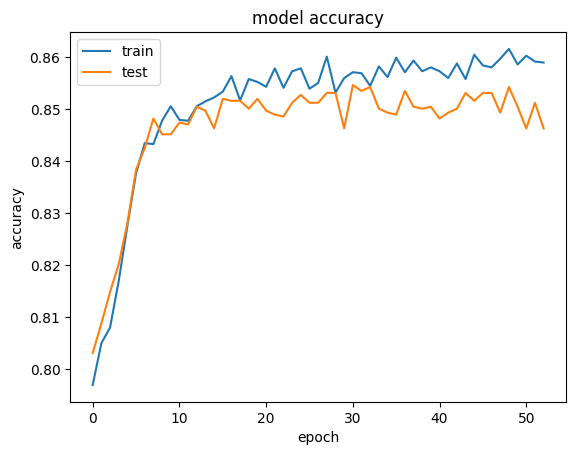

In [78]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

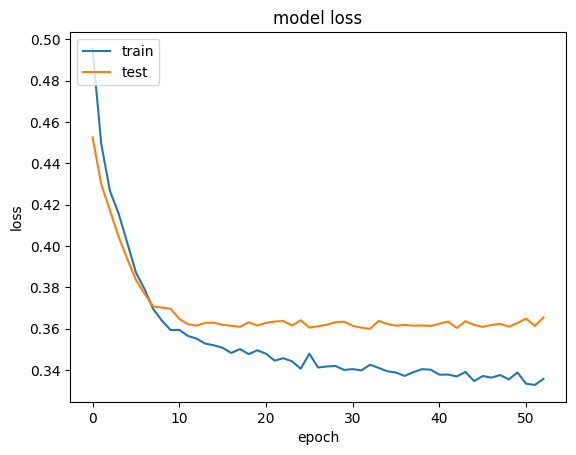

In [79]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [81]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1514,   81],
       [ 199,  206]])

In [82]:
#accuracy
from sklearn.metrics import accuracy_score

In [83]:
score=accuracy_score(y_pred,y_test)

In [84]:
score

0.86

In [85]:
# get the weights
classifier.get_weights()

[array([[-0.09278317,  0.18908434,  0.23643081,  0.13490832,  0.03155698,
          0.29265833,  0.14686146, -0.3867857 ,  0.06686487, -0.08975703,
         -0.37670413],
        [ 0.45905003,  0.30549175, -0.55773115, -0.21746796, -0.63430595,
          0.49144498, -0.6080326 ,  0.2049647 ,  0.7914799 , -0.27457413,
          0.6471419 ],
        [ 0.04310943,  0.3605588 ,  0.29371879,  0.32188094,  0.02830646,
          0.38828948, -0.0133219 , -0.43415993,  0.13553235,  0.22383218,
         -0.3414656 ],
        [-0.07172211, -0.14432581, -0.6883803 ,  0.03055096,  0.12879176,
         -0.269343  ,  0.03554252,  0.0571133 ,  0.4535485 ,  0.32331997,
         -0.2408414 ],
        [-0.11267029, -1.239844  , -0.07316675,  0.9660745 , -0.18248144,
          0.0049921 , -0.15698166, -0.15307292,  1.0672132 , -0.18532163,
         -1.2399403 ],
        [ 0.04608856, -0.20741984, -0.4415171 , -0.14888732,  0.10367678,
         -0.12638898, -0.11724109, -0.0462481 , -0.07773189, -0.2707117